# NECESSARY IMPORTS

In [1]:
# Initial imports
import os
import requests                                # for making requests to urls
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi            # making requests to Alpaca API
from datetime import datetime                  # for working with dates
from T1AlgoTools import *                      # says to import everything
import matplotlib.pyplot as plt 
#%matplotlib inline                            # for plotting

## Getting Specific Stocks for a Portfolio
#### - multiple stocks can be read in
#### - default portfolio is APPLE stock

In [10]:
my_stocks=Portfolio(tickers=["TSLA","AMZN","AAPL","MSFT"],timeframe="1D")

## Function which calls Alpaca API to get Data

In [11]:
my_stocks.get_data_custom()

## Displaying the Data Collected From Alpaca

In [12]:
my_stocks.data

AAPL                                        \
                             open     high     low     close     volume   
2020-10-13 00:00:00-04:00  124.53  124.740  119.65  121.0500  235482931   
2020-10-14 00:00:00-04:00  120.99  123.030  119.62  121.2900  134225383   
2020-10-15 00:00:00-04:00  118.72  121.200  118.15  120.7453   97188922   
2020-10-16 00:00:00-04:00  121.28  121.548  118.81  118.9600  101036728   
2020-10-19 00:00:00-04:00  119.96  120.419  115.66  116.0000  102829828   
...                           ...      ...     ...       ...        ...   
2021-03-02 00:00:00-05:00  128.41  128.720  125.01  125.1601   91481050   
2021-03-03 00:00:00-05:00  124.81  125.710  121.84  122.0600   99851557   
2021-03-04 00:00:00-05:00  121.75  123.600  118.62  120.2200  160007520   
2021-03-05 00:00:00-05:00  120.98  121.935  117.57  121.3900  143229410   
2021-03-08 00:00:00-05:00  120.93  121.000  116.21  116.4000  141360327   

                              AMZN                                          \
                              open       high       low     close   volume   
2020-10-13 00:00:00-04:00  3473.22  3492.3800  3424.217  3442.640  4746781   
2020-10-14 00:00:00-04:00  3448.90  3464.8800  3340.000  3363.050  5138264   
2020-10-15 00:00:00-04:00  3292.01  3355.8800  3280.000  3338.620  4392321   
2020-10-16 00:00:00-04:00  3362.64  3399.6606  3160.000  3160.000  5431539   
2020-10-19 00:00:00-04:00  3299.61  3329.0000  3192.735  3207.300  4339395   
...                            ...        ...       ...       ...      ...   
2021-03-02 00:00:00-05:00  3143.47  3163.5200  3087.120  3095.990  2354430   
2021-03-03 00:00:00-05:00  3081.18  3107.7750  2995.000  3005.010  3619826   
2021-03-04 00:00:00-05:00  3012.00  3058.1300  2945.430  2977.040  5291821   
2021-03-05 00:00:00-05:00  3005.00  3009.0000  2881.000  3000.450  5094668   
2021-03-08 00:00:00-05:00  3015.00  3064.5900  2951.310  2951.951  3754633   

                               MSFT                                      \
                               open      high     low   close    volume   
2020-10-13 00:00:00-04:00  222.4600  225.2100  220.43  222.83  21752820   
2020-10-14 00:00:00-04:00  223.0300  224.2200  219.13  220.93  18327083   
2020-10-15 00:00:00-04:00  216.9500  220.3600  216.01  219.66  17474580   
2020-10-16 00:00:00-04:00  220.5000  222.2900  219.32  219.65  20421873   
2020-10-19 00:00:00-04:00  220.4150  222.3000  213.72  214.24  20264895   
...                             ...       ...     ...     ...       ...   
2021-03-02 00:00:00-05:00  237.0100  237.3000  233.45  233.87  19279808   
2021-03-03 00:00:00-05:00  232.1550  233.5799  227.28  227.55  29197735   
2021-03-04 00:00:00-05:00  226.7350  232.4900  224.26  226.90  40642140   
2021-03-05 00:00:00-05:00  229.5165  233.2700  226.46  231.58  37372002   
2021-03-08 00:00:00-05:00  231.3700  233.3650  227.13  227.42  31225291   

                               TSLA                                        
                               open      high      low    close    volume  
2020-10-13 00:00:00-04:00  442.2687  448.8900  436.600  446.650  31940408  
2020-10-14 00:00:00-04:00  449.7800  465.9000  447.350  461.470  45105903  
2020-10-15 00:00:00-04:00  450.3000  456.5700  442.500  448.880  33240296  
2020-10-16 00:00:00-04:00  454.4800  455.9499  438.850  439.910  30682837  
2020-10-19 00:00:00-04:00  446.2400  447.0000  428.870  430.830  33337408  
...                             ...       ...      ...      ...       ...  
2021-03-02 00:00:00-05:00  718.2800  721.1100  685.000  686.050  22603566  
2021-03-03 00:00:00-05:00  687.9900  700.7000  651.705  652.220  28458545  
2021-03-04 00:00:00-05:00  655.8000  668.4500  600.000  621.490  64229830  
2021-03-05 00:00:00-05:00  626.0600  627.8419  539.490  597.496  87887363  
2021-03-08 00:00:00-05:00  600.5500  620.1250  558.790  562.970  49103227  

[100 rows x 20 columns]

## Computing Selected Indicators for Assets in Portfolio

In [13]:
my_stocks.stoch_osc(),my_stocks.MA(period=20),my_stocks.RSI()

(None, None, None)

## Displaying Data with newly computed Indicators for each asset

In [14]:
my_stocks.data

AAPL                                        \
                             open     high     low     close     volume   
2020-10-13 00:00:00-04:00  124.53  124.740  119.65  121.0500  235482931   
2020-10-14 00:00:00-04:00  120.99  123.030  119.62  121.2900  134225383   
2020-10-15 00:00:00-04:00  118.72  121.200  118.15  120.7453   97188922   
2020-10-16 00:00:00-04:00  121.28  121.548  118.81  118.9600  101036728   
2020-10-19 00:00:00-04:00  119.96  120.419  115.66  116.0000  102829828   
...                           ...      ...     ...       ...        ...   
2021-03-02 00:00:00-05:00  128.41  128.720  125.01  125.1601   91481050   
2021-03-03 00:00:00-05:00  124.81  125.710  121.84  122.0600   99851557   
2021-03-04 00:00:00-05:00  121.75  123.600  118.62  120.2200  160007520   
2021-03-05 00:00:00-05:00  120.98  121.935  117.57  121.3900  143229410   
2021-03-08 00:00:00-05:00  120.93  121.000  116.21  116.4000  141360327   

                                                                        \
                          stoch_fast stoch_slow      SMA-20     RSI-14   
2020-10-13 00:00:00-04:00        NaN        NaN         NaN   0.000000   
2020-10-14 00:00:00-04:00        NaN        NaN         NaN   0.000000   
2020-10-15 00:00:00-04:00        NaN        NaN         NaN   0.000000   
2020-10-16 00:00:00-04:00        NaN        NaN         NaN   0.000000   
2020-10-19 00:00:00-04:00        NaN        NaN         NaN   0.000000   
...                              ...        ...         ...        ...   
2021-03-02 00:00:00-05:00  34.741623  32.466260  130.885175  28.504630   
2021-03-03 00:00:00-05:00  19.731183  34.236697  130.239175  25.970746   
2021-03-04 00:00:00-05:00  10.166667  21.546491  129.555175  24.551318   
2021-03-05 00:00:00-05:00  17.026107  15.641319  128.754675  26.825931   
2021-03-08 00:00:00-05:00  -6.344902   6.949290  127.736175  24.571077   

                              AMZN  ...       MSFT      TSLA            \
                              open  ...     RSI-14      open      high   
2020-10-13 00:00:00-04:00  3473.22  ...   0.000000  442.2687  448.8900   
2020-10-14 00:00:00-04:00  3448.90  ...   0.000000  449.7800  465.9000   
2020-10-15 00:00:00-04:00  3292.01  ...   0.000000  450.3000  456.5700   
2020-10-16 00:00:00-04:00  3362.64  ...   0.000000  454.4800  455.9499   
2020-10-19 00:00:00-04:00  3299.61  ...   0.000000  446.2400  447.0000   
...                            ...  ...        ...       ...       ...   
2021-03-02 00:00:00-05:00  3143.47  ...  28.504630  718.2800  721.1100   
2021-03-03 00:00:00-05:00  3081.18  ...  25.970746  687.9900  700.7000   
2021-03-04 00:00:00-05:00  3012.00  ...  24.551318  655.8000  668.4500   
2021-03-05 00:00:00-05:00  3005.00  ...  26.825931  626.0600  627.8419   
2021-03-08 00:00:00-05:00  3015.00  ...  24.571077  600.5500  620.1250   

                                                                             \
                               low    close    volume stoch_fast stoch_slow   
2020-10-13 00:00:00-04:00  436.600  446.650  31940408        NaN        NaN   
2020-10-14 00:00:00-04:00  447.350  461.470  45105903        NaN        NaN   
2020-10-15 00:00:00-04:00  442.500  448.880  33240296        NaN        NaN   
2020-10-16 00:00:00-04:00  438.850  439.910  30682837        NaN        NaN   
2020-10-19 00:00:00-04:00  428.870  430.830  33337408        NaN        NaN   
...                            ...      ...       ...        ...        ...   
2021-03-02 00:00:00-05:00  685.000  686.050  22603566  27.844684  28.789232   
2021-03-03 00:00:00-05:00  651.705  652.220  28458545  14.710832  26.993200   
2021-03-04 00:00:00-05:00  600.000  621.490  64229830   1.180767  14.578761   
2021-03-05 00:00:00-05:00  539.490  597.496  87887363  -1.133032   4.919522   
2021-03-08 00:00:00-05:00  558.790  562.970  49103227   8.340734   2.796156   

                                                
                             SMA-20     RSI-14  
2

## Plotting the Stochastic Indicator for AAPL

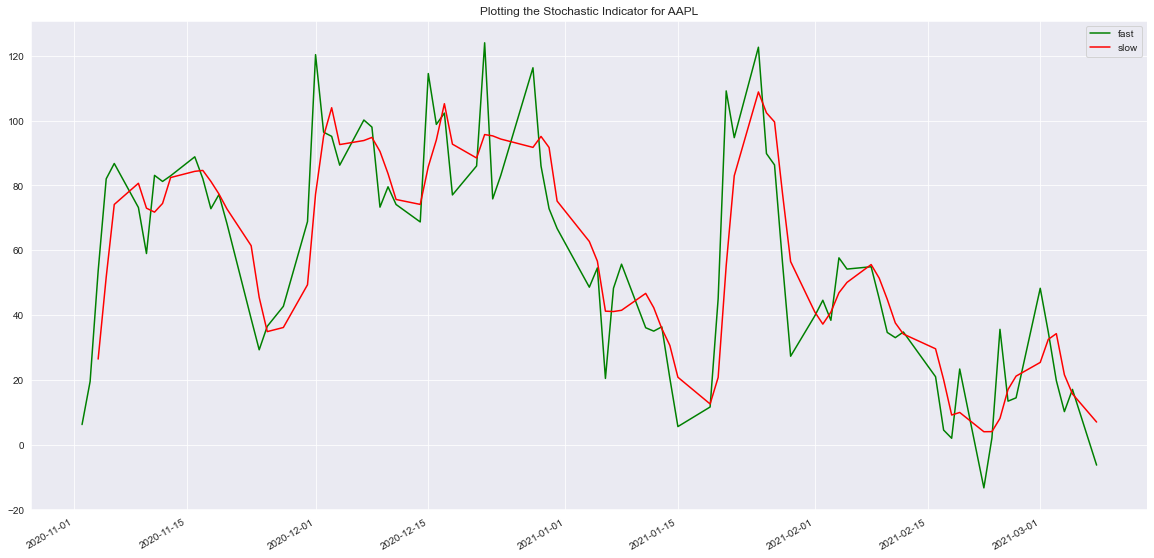

In [15]:
ax=my_stocks.data["AAPL"]["stoch_fast"].plot(color="green",figsize=(20,10),title="Plotting the Stochastic Indicator for AAPL")
ax=my_stocks.data["AAPL"]["stoch_slow"].plot(color="red")
ax.legend(["fast","slow"])